## Problem:- 
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topic of this report.

### Understanding our Dataset
The datasets contains the booking information of two hotel. One of the hotels is a resort hotel (34%) and the other is a city hotel (66%). Let's now have a look at the columns of this dataset.
- 'hotel':- Either city or resort hotel.
- 'is_canceled':- Value indicating if the booking was canceled (1) or not (0).
- 'lead_time':- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- 'arrival_date_year':- Year of arrival date.
- 'arrival_date_month':- Month of arrival date with 12 categories: “January” to “December”
- 'arrival_date_week':- Week number of the arrival date.
- 'arrival_date_day':- Day of the month of the arrival date.
- 'stays_in_weekend_nights':- Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- 'stays_in_week_nights':- Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting.
- 'adults':- Number of adults
- 'children':- Number of children
- 'babies':- Number of babies
- 'meal':- Meal (BB:- Bread & Breakfast)
- 'country':- Country of origin
- 'market_segment':- Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- 'distribution_channels':- Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- 'is_repeated_guest':- Value indicating if the booking name was from a repeated guest (1) or not (0)
- 'previous_cancellations':- Number of previous bookings that were cancelled by the customer prior to the current booking
- 'previous_bookings':- Number of previous bookings not cancelled by the customer prior to the current booking
- 'reserved_room_type':- Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- 'assigned_room_type':- Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type
- 'booking_changes':- Number of changes/amendments made to the booking from the moment the booking was entered on the PMS.
- 'deposit_type':- No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost
- 'agent':- ID of the travel agency that made the booking
- 'company':- ID of the company/entity that made the booking or responsible for paying the booking
- 'days_in_waiting_list':- Number of days the booking was in the waiting list before it was confirmed to the customer
- 'customer_type':- Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- 'adr':- Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights). The average daily rate (ADR) is a metric widely used in the hospitality industry to indicate the average revenue earned for an occupied room on a given day.
- 'required_car_parking_spaces':- Number of car parking spaces required by the customer
- 'total_of_special_requests':- Number of special requests made by the customer (e.g. twin bed or high floor)
- 'reservation_status':- Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- 'reservation_status_date':- Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
- 'name':- Name of the Guest (Not Real)
- 'email':- Email (Not Real)
- 'phone-number':- Phone number (not real)
- 'credit_card':- Credit Card Number (not Real)

### 1. Importing necessary packages

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### 2. Loading the dataset

In [2]:
#Importing necessary datasets
data = pd.read_csv("hotel_booking.csv")

### 3. Exploratory Data Analysis and Data Cleaning

In [3]:
#Checking top 5 rows of our dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
#Checking shape of the dataset
print("Number of rows in the dataset:- ", data.shape[0])
print("Number of columns in the dataset:- ", data.shape[1])

Number of rows in the dataset:-  119390
Number of columns in the dataset:-  36


In [5]:
#Checking the columns of our dataset
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
#Checking information like data types, and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Here, we can observe that the data-type of column 'reservation_status_date' is 'object', which needs to be converted to date format.

In [7]:
data['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [8]:
#Changing datatype of 'reservation_status_date'
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [9]:
#Checking data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Also, we can observe several columns with values of 'object' data-type. These columns actually store categorical values in them. In order to check unique values in them along with some statistics, we can use describe() method.

Now, describe() function is used to display summary statistics of numerical columns but we can use 'describe(include='all')' to get statistics for all columns

In [10]:
data.describe(include='all') #Here, we can now see the 'count' and number of 'unique' values along with various other statistics

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,926,81503,115889,119390,9000
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-21 00:00:00,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,89613,NaN,NaN,NaN,75166,1461,48,6,1,28
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2014-10-17 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-09-14 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Note:- we can just use 'include='object'' to just include columns with object data-type
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


Now we are interested in getting the categories inside each of these columns.

In [12]:
#Displaying unique values for all columns
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

Here are few things that we may need to understand:
- 'meal' column isn't going to be of any use to us. 
- In 'market_segment' column:
    - 'TA' is 'Travel Agent'
    - 'TO' is 'Tour Operator'
    - 'Direct' means that the customers are coming directly to the hotels to book their rooms
- 'distribution_channel' isn't going to be any use to us.

In [13]:
#Checking missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
#Checking missing values by percentage
data.isnull().sum()/len(data)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Here, we have 4 columns 'children', 'country', 'agent' and 'company' which contain missing values.

Out of these, we have columns 'agent' and 'company' which contain a higher proportion of missing values in them, and handling such huge number of missing values is not preferred. Hence, we may safely remove these columns from the list.

Also, in columns like 'country' and 'children', only 488 (0.408%) and 4 (0.00335%) records are missing respectively. So removing the rows consisting these records isn't going to affect our dataset much. Hence, we may safely remove the rows containing these missing values.

In [15]:
data.drop(columns = ['agent','company'], inplace=True)

In [16]:
data.shape

(119390, 34)

In [17]:
#Removing rows with missing values in 'children' and 'country' column
data.dropna(inplace=True)

In [18]:
data.shape

(118898, 34)

In [19]:
#Checking missing values
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Clearly, there are no missing values left in our dataset 

In [20]:
#Now, checking summary statistics for numerical columns
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Here, we can check there are many outliers in this dataset. For eg:- 75 percentile of 'lead_time' is 161, while the maximum value is '737'. Clearly, 737 is an outlier. 

It's a personal choice to either remove them or not from the dataset. For good analysis, you may remove it. Here, we are not removing them as of now.

However, there are some really big outliers like in 'adr' (average daily rate) column, we have the value 5400 as the outlier.
Let's plot a boxplot to see how it actually looks.

<AxesSubplot:>

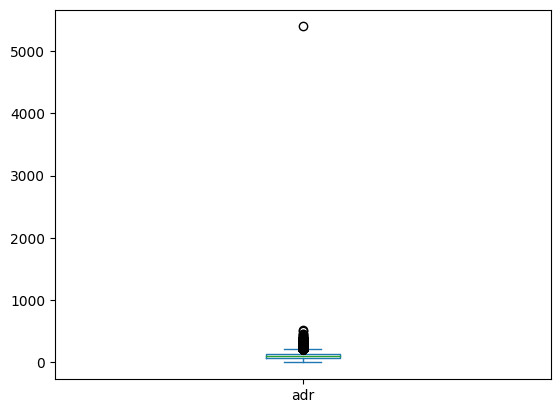

In [21]:
#Plotting a boxplot for 'adr' column
data['adr'].plot(kind='box')

Clearly 5400 is an unreal outlier which can be removed for better analysis.

In [22]:
#Removing the row corresponding to 5400
data = data[data['adr']<5000]

In [23]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


### Data Analysis and Visualizations

Firstly, we are interested in checking the amount of reservations cancelled v/s those not cancelled

In [24]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [25]:
#checking the percentage of 'cancelled'
len(data[data['is_canceled']==1])/len(data['is_canceled'])*100

37.134662775343365

In [26]:
#Aliter
canceled_per = data['is_canceled'].value_counts(normalize=True)*100 #also shows the percentage
canceled_per

0    62.865337
1    37.134663
Name: is_canceled, dtype: float64

Clearly, 37.134% of the reservations were cancelled while 62.865% weren't.

Here, 37.134% is a high percentage of cancellation for any hotel. 

The percentage of reservations not canceled:-  62.87 %
The percentage of reservations canceled:-  37.13 %


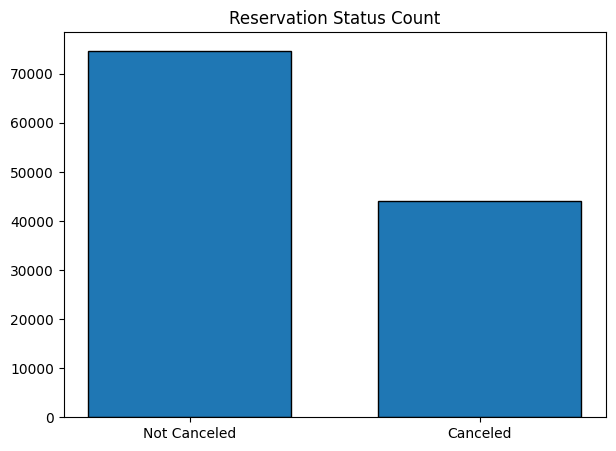

In [27]:
#Visualizing data

print("The percentage of reservations not canceled:- ", round(canceled_per[0],2), "%")
print("The percentage of reservations canceled:- ", round(canceled_per[1],2), "%")


plt.figure(figsize=(7,5))
plt.title("Reservation Status Count")
#Using bar graph to represent categorical variables
plt.bar(['Not Canceled','Canceled'],data['is_canceled'].value_counts(), edgecolor="black", width=0.7)
plt.show()

Clearly, the bar plot for 'canceled' reservations is more than half of 'Not Canceled' reservations.

Let's check the same for different hotels.

### Visualizing Reservation Status in both Hotels

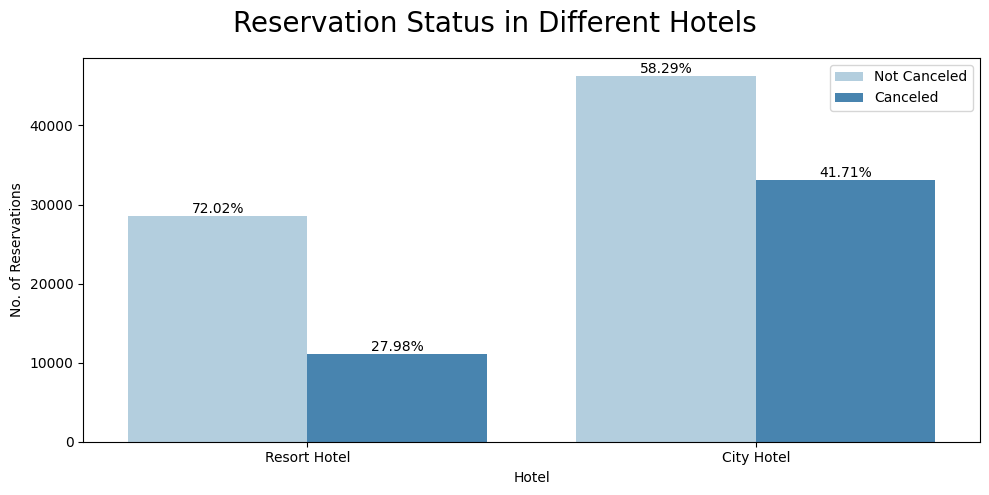

In [28]:
#Using countplot to visualize
plt.figure(figsize=(10,5))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data=data, palette='Blues') #Creating a countplot for both regions

#Showing percentages above each bar
#'Rect' variable representing each bar
#Each bar has been named in accordance to our comfort

rect1 = ax1.patches[0]
rect3 = ax1.patches[1]
rect2 = ax1.patches[2]
rect4 = ax1.patches[3]

#Here, plt.annotate() is used to show/annotate some text
#We're using it here to annotate percentages
plt.annotate("{:.2f}%".format(data[data['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True)[0]*100),
             (rect1.get_x() + rect1.get_width()/2, rect1.get_height()+0.5),
             ha="center",va='bottom')

plt.annotate("{:.2f}%".format(data[data['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True)[1]*100),
             (rect2.get_x() + rect2.get_width()/2, rect2.get_height()+0.5),
             ha="center",va='bottom')

plt.annotate("{:.2f}%".format(data[data['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)[0]*100),
             (rect3.get_x() + rect3.get_width()/2, rect3.get_height()+0.5),
             ha="center",va='bottom')

plt.annotate("{:.2f}%".format(data[data['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)[1]*100),
             (rect4.get_x() + rect4.get_width()/2, rect4.get_height()+0.5),
             ha="center",va='bottom')

plt.suptitle("Reservation Status in Different Hotels", size=20)
plt.xlabel('Hotel')
plt.ylabel("No. of Reservations")
plt.legend(['Not Canceled','Canceled'])
plt.tight_layout()
plt.show()


Here, we can clearly observe that,
- City hotel has higher cancellation rate (41.71%) in comparison to Resort Hotel (27.98%)
- Now, we will look for possible reasons for high cancellations in City Hotel

In [29]:
#Checking how 'Adr' affects cancellations
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Visualizing 'ADR' for City and Resort Hotels

In [30]:
#Let
resort_df = data[data['hotel']=='Resort Hotel']
#and
city_df = data[data['hotel']=='City Hotel']

In [31]:
#Finding the mean 'adr' by grouping resort hotel data by 'reservation_status_date'
#This implies that we are looking for mean 'adr' for all the bookings for a particular date
resort_mean_adr = resort_df.groupby('reservation_status_date')[['adr']].mean()
resort_mean_adr.head()

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209


In [32]:
#Applying the same for city hotel
city_mean_adr = city_df.groupby('reservation_status_date')[['adr']].mean()
city_mean_adr.head()

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000


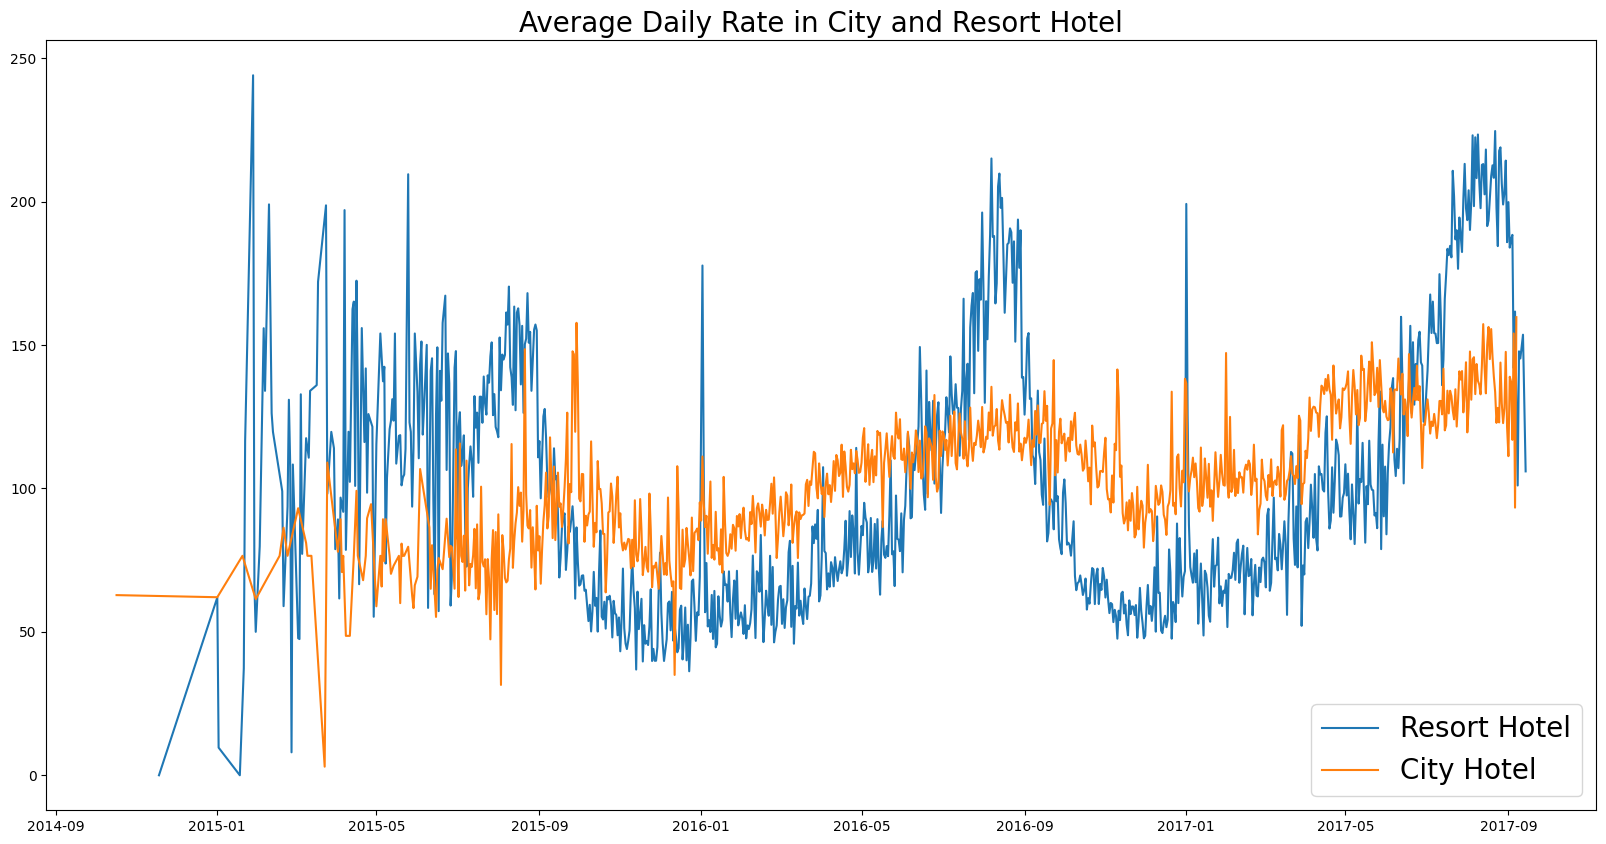

In [33]:
#Visualizing our findings
plt.figure(figsize=(20,10))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=20)
plt.plot(resort_mean_adr.index, resort_mean_adr['adr'], label='Resort Hotel')
plt.plot(city_mean_adr.index, city_mean_adr['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

Here, we can observe that-
- There are certain points where the ADR shoots up for both city and resort hotels, which could be an indication of increased rates during weekends.
- A high variation in resort hotel 'adr' could be due to less people booking resort hotel over city hotel. Hence, the rate shoots up or goes down in accordance to demand.

### Visualizing Reservations as well as their Status by Month

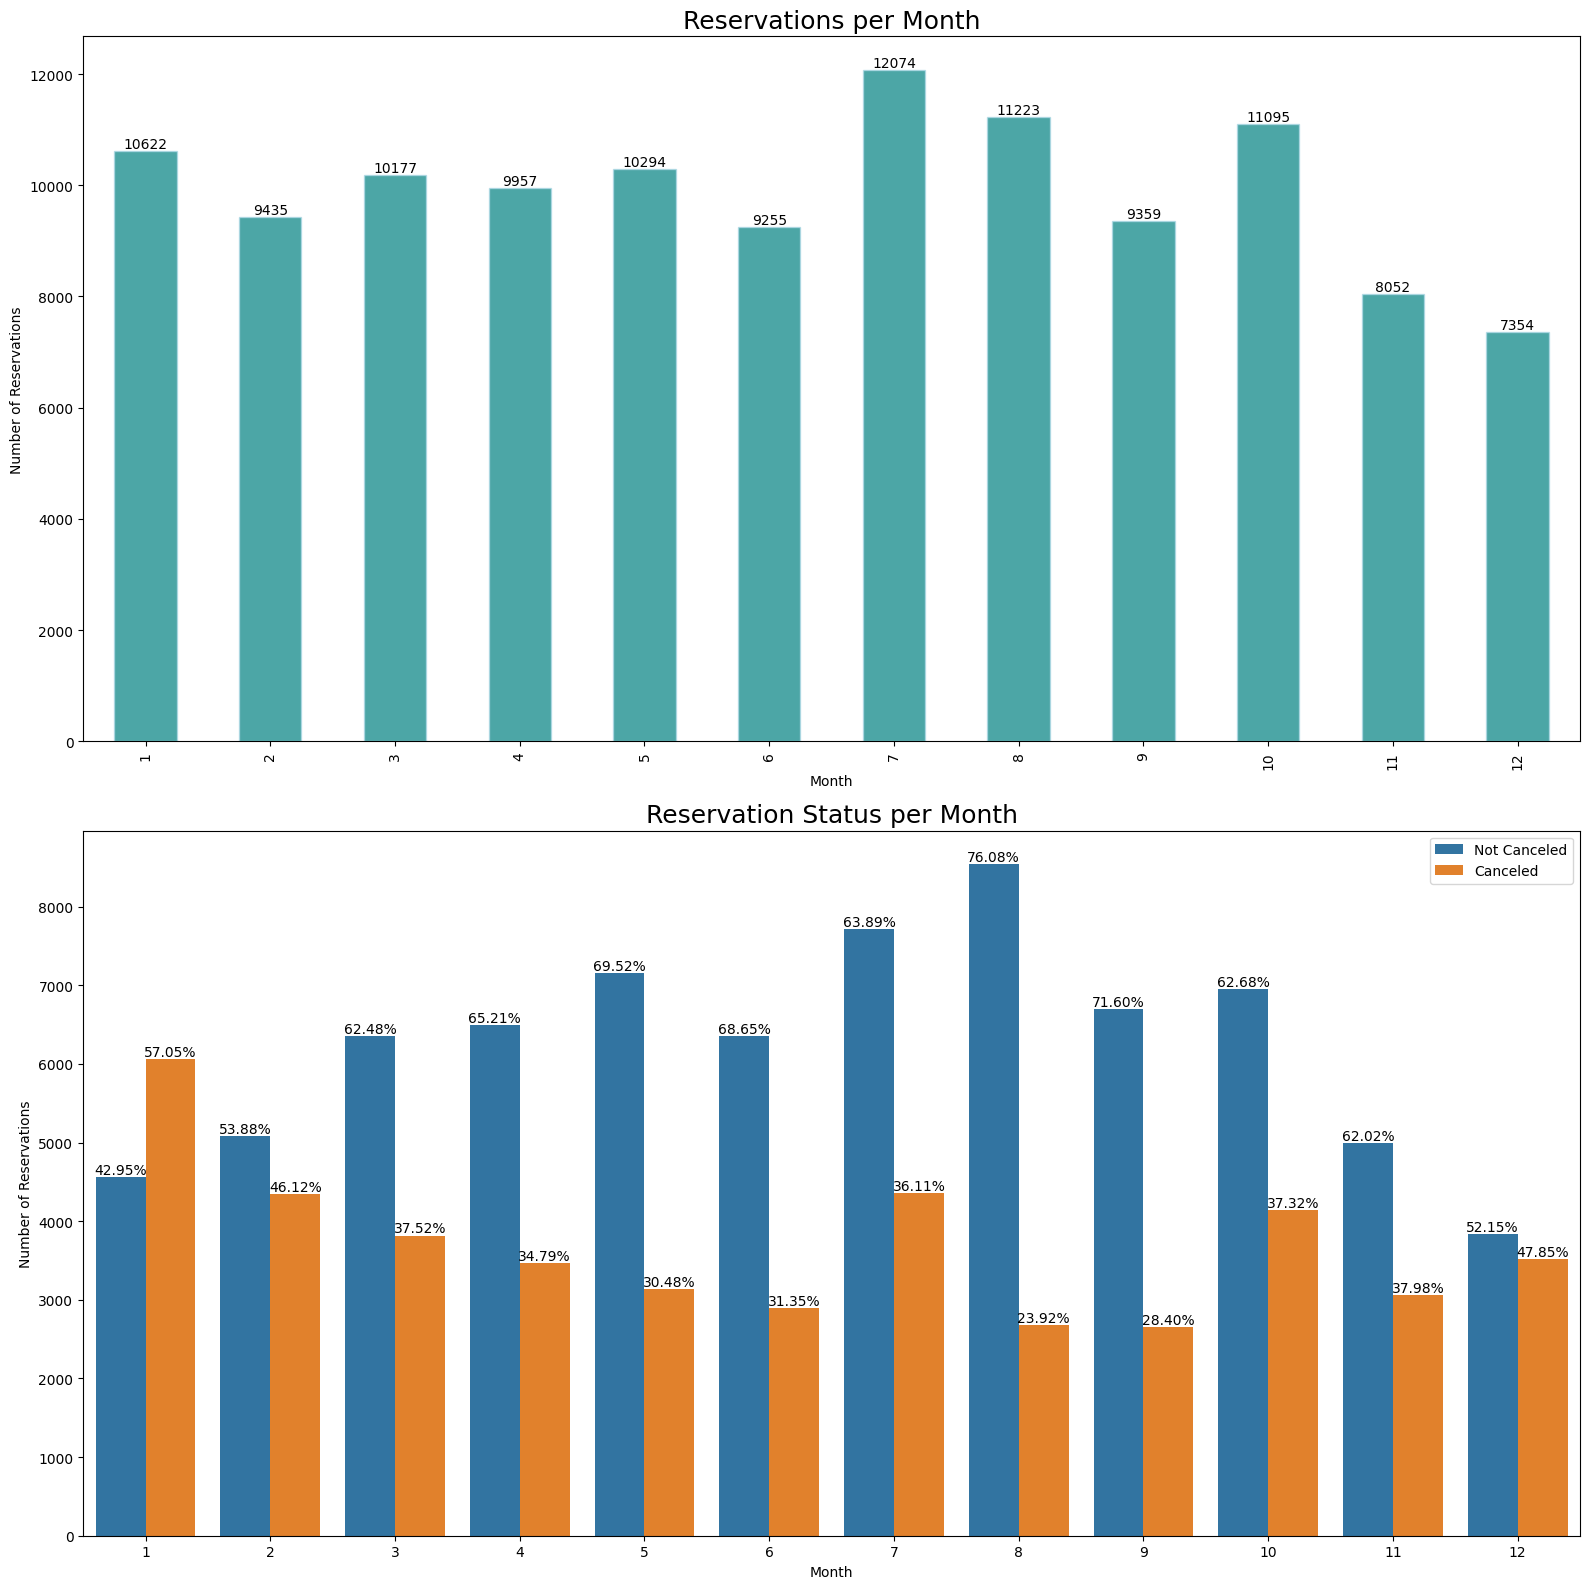

In [34]:
#Plotting visualization for booking and cancellation rates for different months

data['month'] = data['reservation_status_date'].dt.month

plt.figure(figsize=(16,16))

plt.subplot(2,1,1)

ax = data['month'].value_counts().sort_index().plot(kind='bar', color='teal',
                                           alpha=0.7, edgecolor='lightblue')
for rect in ax.patches:
    height = rect.get_height()
    plt.annotate('{}'.format(height),
                (rect.get_x() + rect.get_width()/2, height+0.5),
                 ha='center', va='bottom')

plt.title('Reservations per Month', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')


plt.subplot(2,1,2)

ax1 = sns.countplot(x = 'month', 
                    hue = 'is_canceled', #Hue yaani ki kis variable ke basis par data group karna hai
                   data = data)

for i in range(1,13):
    #Bars for 'non-cancellations [0-11]'
    rect1 = ax1.patches[i-1]
    height1 = rect1.get_height()
    plt.annotate("{:.2f}%".format(height1/len(data[data['month']==i])*100),
                (rect1.get_x() + rect1.get_width()/2,height1+0.5),ha="center",va='bottom')

    #Bars for 'cancellations' [12-23]
    rect2 = ax1.patches[i+12-1]
    height2 = rect2.get_height()
    plt.annotate("{:.2f}%".format(height2/len(data[data['month']==i])*100),
                (rect2.get_x() + rect2.get_width()/2,height2+0.5),ha="center",va='bottom') 


plt.title('Reservation Status per Month', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled','Canceled'])
plt.tight_layout()
plt.show()

Here, we can clearly observe that:- 
- Highest number of reservations are in the month of July (12074).
- Least number of reservations are in the month of December (7354).
- Highest percentage of cancellations are in the month of January (57.05%).
- Least percentage of cancellations are in the month of August (23.92%).

Also, we can somewhat observe that:- 
- The month with higher number of reservations has fewer cancellations and vice versa. Thus, there seems to be a loose correlation between cancellations and number of reservations.
- However, there are few exceptions like January where number of reservations as well as number of cancellations are both quite high.
- Thus, we shall now try to find which variable affects cancellations in different month.

### Visualizing 'ADR' for Cancelled Reservations by Month

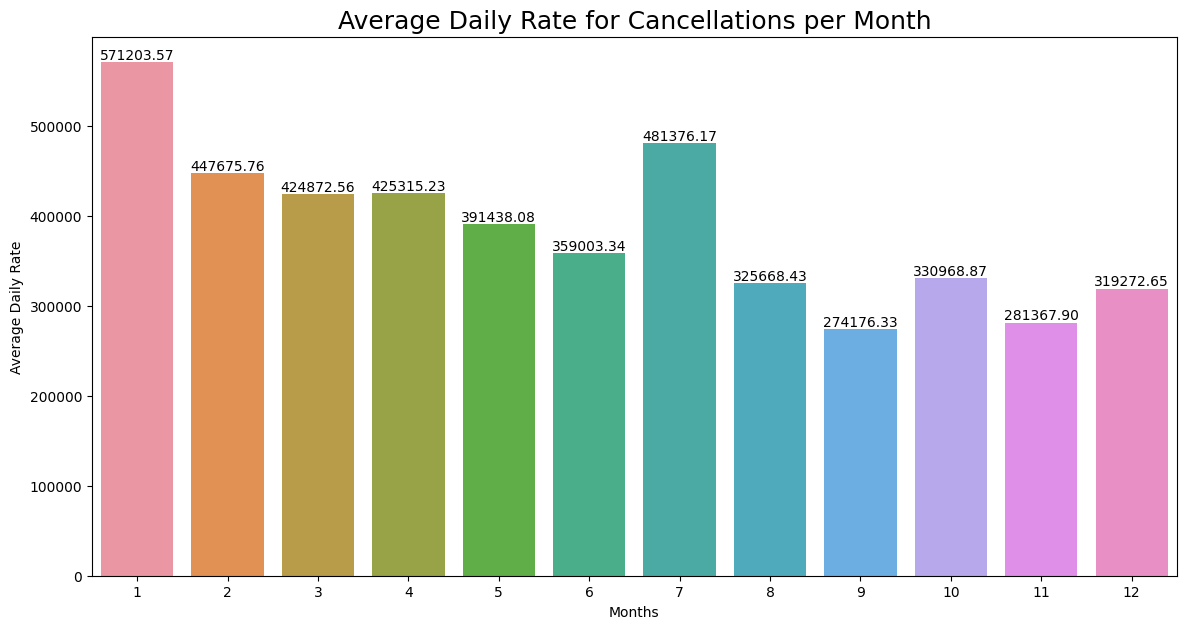

In [37]:
#Now, let's see whether 'Adr' affects the cancellations in different months.
#Checking total 'adr' per month for every cancellation

canceled_adr = data[data['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()

plt.figure(figsize=(14,7))

ax = sns.barplot(x = 'month', y = 'adr', data = canceled_adr)

for rect in ax.patches:
    height = rect.get_height()
    plt.annotate('{:.2f}'.format(height),(rect.get_x() + rect.get_width()/2, height+0.5), va='bottom', ha='center')

plt.ylabel('Average Daily Rate')
plt.xlabel('Months')
plt.title('Average Daily Rate for Cancellations per Month', fontsize=18)
plt.show()

It is clearly visible that:- 
- When compared with the previous plot, the 'ADR' per month seems to affect the total cancellations in any particular month.
- For instance, 'ADR' is highest for the month of January, which also has the highest number of cancellations.
- Also, 'ADR' is lowest for the month of September, which also has least number of cancellations. We can observe the same for each month.
- Thus, it can easily be proved that higher price results in higher cancellations

Note:- When we compare the graphs, the percentages given in the previos graph are not to be considered since they are only to represent cancellation rate for particular month, they don't represent total cancellations. 

### Visualizing the effect of country/region on cancellations

In [44]:
#Analysis for Top 10 countries with most number of cancellations
canceled_data = data[data['is_canceled']==1]

top_10_country = canceled_data['country'].value_counts()[:10]
top_10_country

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

Here, 
- PRT = Portugal
- GBR = Great Britain
- ESP = Spain
- FRA = France
- ITA = Italy
- DEU = Deutschland (Germany)
- IRL = Ireland
- BRA = Brazil
- USA = United States of America
- BEL = Belgium

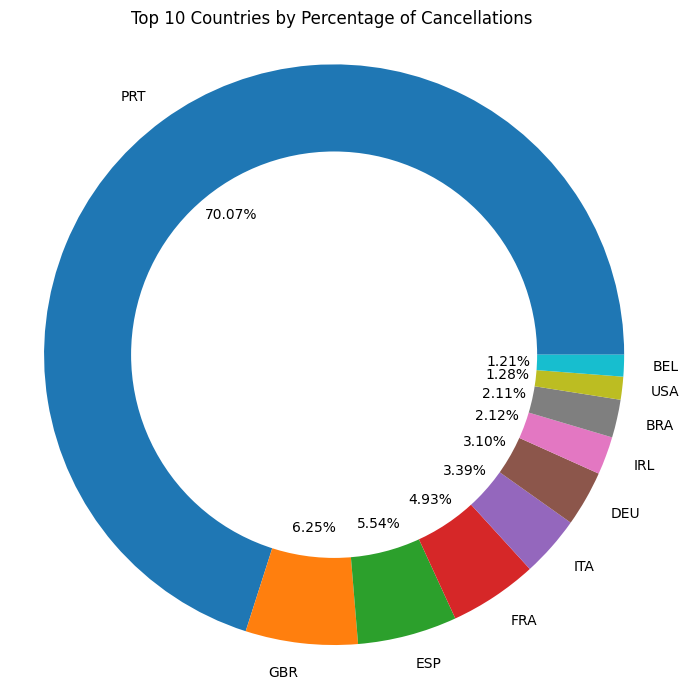

In [101]:
#Plotting a pie-chart to visualize our findings
plt.figure(figsize=(7,7))
labels = top_10_country.index
sizes = top_10_country
plt.pie(sizes, autopct = '%.2f%%', labels = labels, startangle = 0)
center_circle = plt.Circle((0,0),0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal') #Equal aspect-ratio of the circle
plt.title("Top 10 Countries by Percentage of Cancellations")
plt.tight_layout()
plt.show()

Clearly, Portugal has the highest number of cancellations. Hence, the hotels need to focus towards their strategy for customers from Portugal. This can be accomplished by few methods:- 
- Reducing price for the particular country.
- Offering special discounts.
- Increase facilities and try to understand their requirements.

### Checking the effect of 'Market Segment' on Cancellations

In [65]:
#Checking the market segment of the customers
data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [68]:
#Checking percentage
data['market_segment'].value_counts(normalize=True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

Clearly, our hypothesis that 'majority of clients are coming from offline travel agents to make their reservations' is proven false as nearly half of the customers came from 'Online TA' and only 20% came through 'Offline TA'

In [71]:
#Checking the same for 'canceled' reservations
canceled_data['market_segment'].value_counts(normalize=True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

It can be observed that from all the cancellations, nearly 47% are from 'Online TA'. One possible reason could be that the customer is shown pictures and facilities that are different from the actual conditions of the hotel, which is the problem in majority of all online bookings.

Thus, it is advisable for hotels to prepare their hotels and provide their clients all the facilities as per the pictures which they use online to attract customers. 

### Visualizing the 'ADR' for cancellations as well as non-cancellations

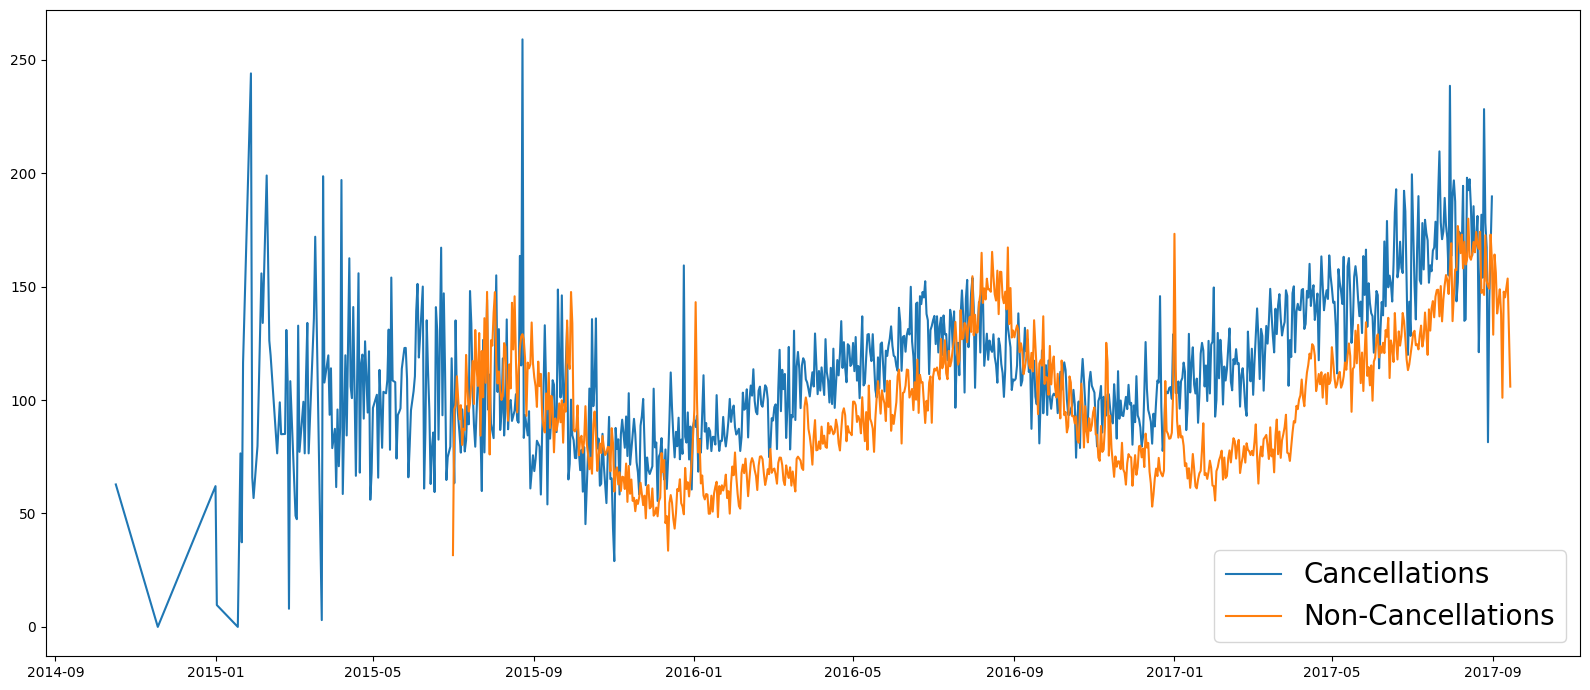

In [95]:
#Let's check whether 'ADR' is high for cancellations or non-cancellations
canceled_data = data[data['is_canceled']==1]
canceled_mean_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_mean_adr.reset_index(inplace = True)
canceled_mean_adr.sort_values('reservation_status_date', inplace = True)

non_canceled_data = data[data['is_canceled']==0]
non_canceled_mean_adr = non_canceled_data.groupby('reservation_status_date')[['adr']].mean()
non_canceled_mean_adr.reset_index(inplace = True)
non_canceled_mean_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize=(16,7))
plt.plot(canceled_mean_adr['reservation_status_date'], canceled_mean_adr['adr'], label='Cancellations')
plt.plot(non_canceled_mean_adr['reservation_status_date'], non_canceled_mean_adr['adr'], label='Non-Cancellations')
plt.legend(fontsize=20)



plt.tight_layout()

plt.show()

Here, we can observe that the slight rise in 'ADR' is also  somewhere related to cancellations (shown by line in 'Blue' color) where as non-cancellations have relatively lower 'ADR'.

Note:- The absence of 'orange' line in the figure above could be due to lack of data or missing data. Hence, we can ignore the part before 2015-09 to check our analysis.

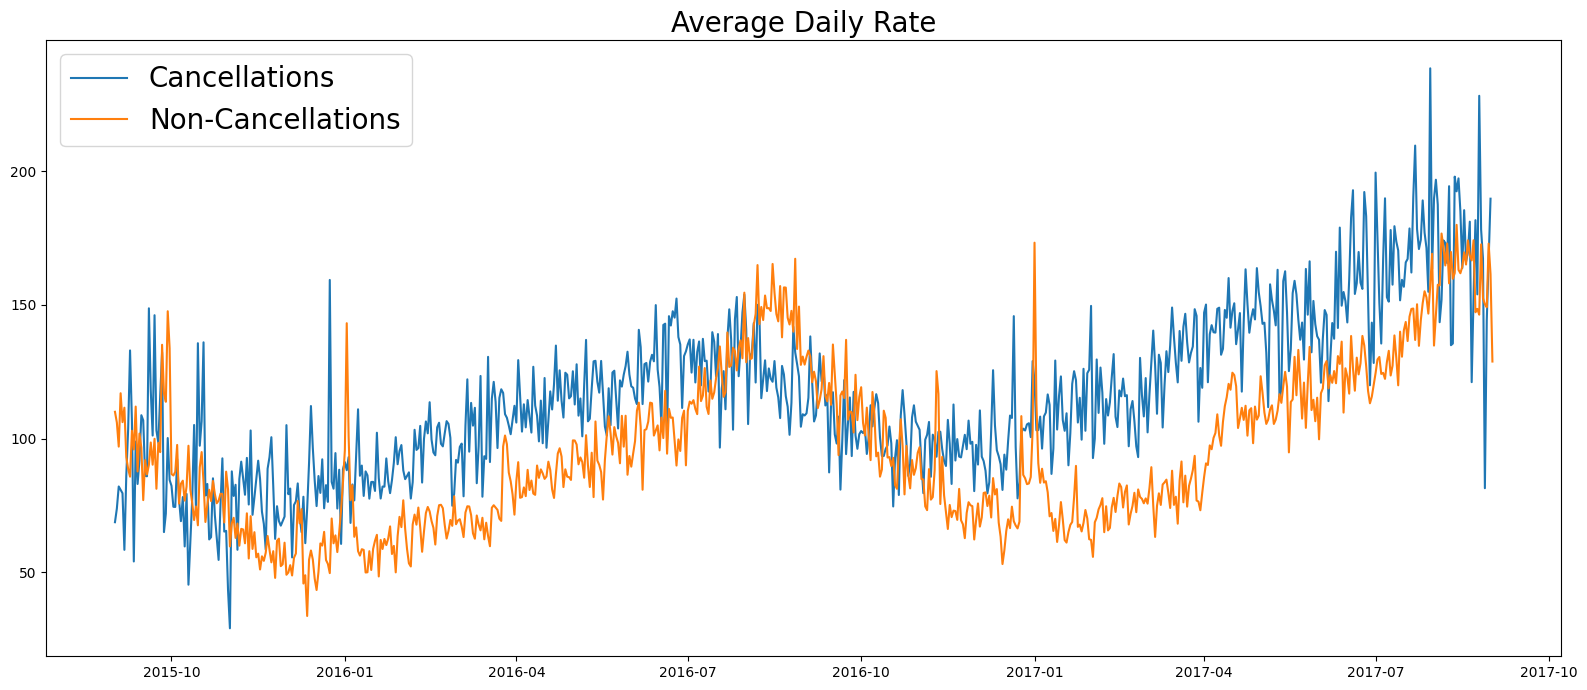

In [100]:
#Checking 'ADR' between dates 2015-09 and 2017-09
canceled_data = data[data['is_canceled']==1]
canceled_mean_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_mean_adr.reset_index(inplace = True)
canceled_mean_adr.sort_values('reservation_status_date', inplace = True)
canceled_mean_adr = canceled_mean_adr[(canceled_mean_adr['reservation_status_date'] >= '2015-09') &
                                       (canceled_mean_adr['reservation_status_date'] <= '2017-09')]

non_canceled_data = data[data['is_canceled']==0]
non_canceled_mean_adr = non_canceled_data.groupby('reservation_status_date')[['adr']].mean()
non_canceled_mean_adr.reset_index(inplace = True)
non_canceled_mean_adr.sort_values('reservation_status_date', inplace = True)
non_canceled_mean_adr = non_canceled_mean_adr[(non_canceled_mean_adr['reservation_status_date'] >= '2015-09') &
                                       (non_canceled_mean_adr['reservation_status_date'] <= '2017-09')]


plt.figure(figsize=(16,7))
plt.plot(canceled_mean_adr['reservation_status_date'], canceled_mean_adr['adr'], label='Cancellations')
plt.plot(non_canceled_mean_adr['reservation_status_date'], non_canceled_mean_adr['adr'], label='Non-Cancellations')
plt.legend(fontsize=20)

plt.title('Average Daily Rate', fontsize=20)

plt.tight_layout()

plt.show()

Now from the above plot, we can agree that high 'ADR' is definitely a reason behind high 'Cancellations'

### Conclusions:- 
- Nearly 1/3rd of all the reservations are getting cancelled.
- On closer inspection, City Hotel have higher cancellation rates (41.71%) compared to Resort Hotel (27.98%)
- A month with higher number of reservations has comparatively lower reservations. However, there are exceptions to it.
- Months with high 'ADR' tends to experience higher cancellations compared to months with lower 'ADR'
- Portugal has the most number of cancellations.
- Higher 'ADR' is observed to be a reason behind cancellations.

### Suggestions:- 
- The best way to tackle high cancellation rate is to keep a cap on 'ADR'.
- Hotels can offer discounts for regular clients and on special occasions in order to attract more clients.
- Since most of the cancellations are from 'Portugal', the hotels should pay special attention to that segment of clients and prepare accordingly.